In [43]:
import numpy as np
np.random.seed(4)
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [44]:
def cargar_depurar_datos(archivo):
    """
    Carga y depura un archivo CSV de precios de Bitcoin mensual,
    devolviendo tanto el DataFrame limpio como una estructura
    tipo lista de diccionarios de diccionarios.
    """
    
    df = pd.read_csv(archivo, skiprows=2)

    
    df = df.rename(columns={
        "Date": "Date",
        "Unnamed: 1": "Close",
        "Unnamed: 2": "High",
        "Unnamed: 3": "Low",
        "Unnamed: 4": "Open",
        "Unnamed: 5": "Volume"
    })

    
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

    
    for col in ["Close", "High", "Low", "Open", "Volume"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")

   
    df.dropna(inplace=True)

   
    df.set_index("Date", inplace=True)

    return df
archivo = "C:/Users/jeron/OneDrive/Escritorio/CoinPredictor/Datos/bitcoin_diario.csv"
df = cargar_depurar_datos(archivo)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4029 entries, 2014-09-17 to 2025-09-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4029 non-null   float64
 1   High    4029 non-null   float64
 2   Low     4029 non-null   float64
 3   Open    4029 non-null   float64
 4   Volume  4029 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 188.9 KB
None


In [45]:
X = df["Close"].values.reshape(-1, 1)
y = df["Volume"].values.reshape(-1, 1)

print(X)
print(y)

[[   457.33401489]
 [   424.44000244]
 [   394.79598999]
 ...
 [109049.2890625 ]
 [109712.828125  ]
 [109412.1875    ]]
[[   21056800]
 [   34483200]
 [   37919700]
 ...
 [75528654284]
 [57738288949]
 [33826031616]]


In [46]:
n = len(df)
cut = int(n * 0.8)  
X_train, X_test = X[:cut], X[cut:]
y_train, y_test = y[:cut], y[cut:]

X_train_log = np.log1p(X_train)  
X_test_log  = np.log1p(X_test)
y_train_log = np.log1p(y_train)  




In [47]:
modelo = LinearRegression()
modelo.fit(X_train_log, y_train_log)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
y_pred_test_log = modelo.predict(X_test_log)
y_pred_test = np.expm1(y_pred_test_log)

In [ ]:


mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f"MSE: {mse:.2f}  |  R2: {r2:.4f}")

MSE: 29906085623393041776640.00  |  R2: -54.2170


In [50]:
y_pred_full = np.expm1(modelo.predict(np.log1p(X)))


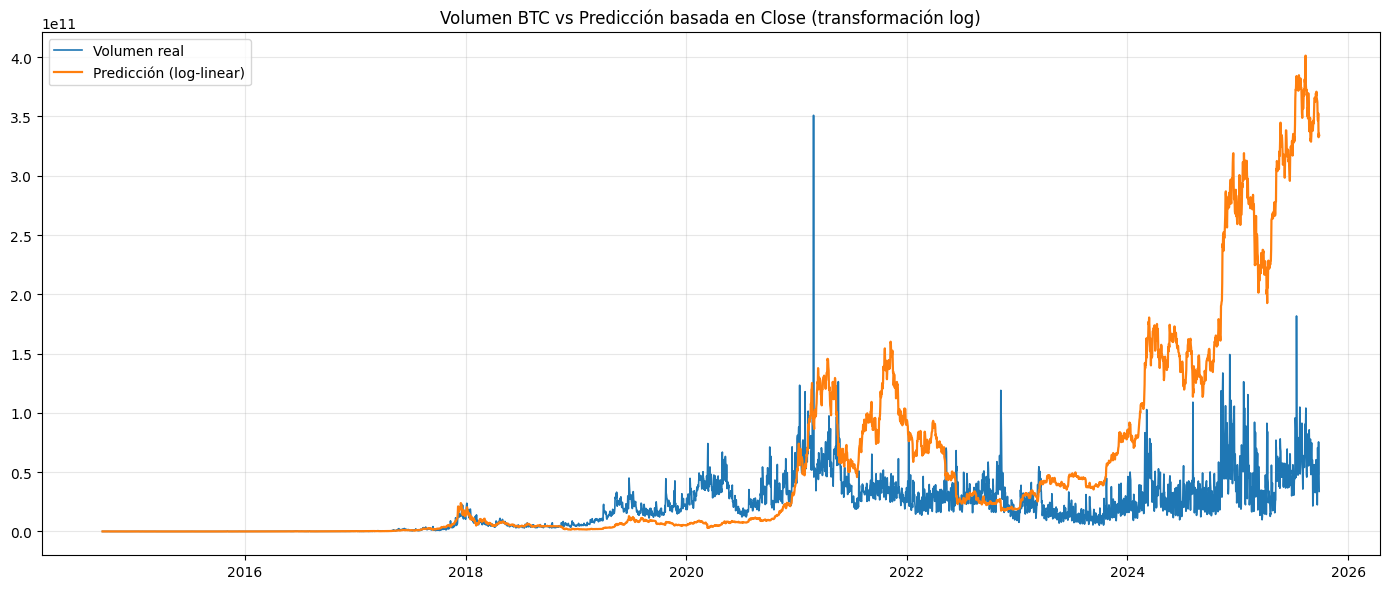

In [51]:

plt.figure(figsize=(14,6))
plt.plot(df.index, df["Volume"].values, label="Volumen real", linewidth=1.2)
plt.plot(df.index, y_pred_full, label="Predicción (log-linear)", linewidth=1.6)
plt.title("Volumen BTC vs Predicción basada en Close (transformación log)")
plt.legend(); plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()


